## 파이썬 위젯 데모: 이산시간 콘볼루션 합

In [19]:
# 파이썬과 함께 배우는 신호와시스템(2판)
# 남승현 지음
# 도서출판 홍릉, 2020

In [20]:
import matplotlib

In [21]:
#matplotlib widget#config InlineBackend.figure_format = 'retina'

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from ipywidgets import ToggleButtons, IntSlider
from ipywidgets import Box, VBox, Layout, Output, TwoByTwoLayout

In [23]:
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

In [24]:
# signal x and h to be convolved
x = lambda n: (5-np.abs(5-n))*((n>=0)&(n<10))/5 
h = lambda n: 1.0*((n>=0)&(n<5)) - 1.0*((n>=5)&(n<10))
n = np.arange(-13, 25)

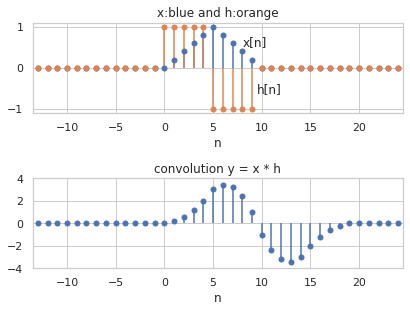

In [25]:
# show convolution procedure step-by-step
k = np.arange(-13, 26)

# Calculate the overall convolution result
y = np.zeros(len(n))
for m, ni in enumerate(n):
    prod = lambda k: x(k) * h(ni-k)
    y[m] = np.sum(prod(k))
    
conv_fig = Output()
with conv_fig:
    fig, (ax1,ax2) = plt.subplots(2,1, figsize=(6,4.5), num='STEPS OF FLIP-AND-SLIDE CONVOLUTION')
    markers_x, = ax1.plot(k, x(k), ls='none', marker='o', ms=5, mfc='C0')
    stem_x = np.c_[k, np.zeros_like(k), k, x(k)].reshape(len(k),2,2)
    col_x = LineCollection(stem_x, colors=['C0'])
    markers_h, = ax1.plot(k, h(k), ls='none', marker='o', ms=5, mfc='C1')
    stem_h = np.c_[k, np.zeros_like(k), k, h(k)].reshape(len(k),2,2)
    col_h = LineCollection(stem_h, colors=['C1'])
    ax1.add_collection(col_x)
    ax1.add_collection(col_h)
    text_x = ax1.text(8, 0.55, 'x[n]', bbox=dict(fc='white',alpha=0,lw=0))
    text_h = ax1.text(9.5, -0.6, 'h[n]', bbox=dict(fc='white',alpha=0,lw=0))
    ax1.set_xlim(-13.5, 24.5)
    ax1.set_xlabel('n')
    ax1.set_ymargin(0.1)
    ax1.set_title('x:blue and h:orange')
    # plot the convolution curve
    markers_y, = ax2.plot(n, y, ls='none', marker='o', ms=5, mfc='C0')
    stem_y = np.c_[n, np.zeros_like(n), n, y].reshape(len(n),2,2)
    col_y = LineCollection(stem_y, colors=['C0'])
    ax2.add_collection(col_y)
    markers_y0, = ax2.plot([], [], ls='none', marker='o', ms=7, mfc='r', mec='r')
    stem_y0 = np.c_[0, 0, 0, 0].reshape(1,2,2)
    col_y0 = LineCollection(stem_y0, colors=['r'], lw=3)
    ax2.add_collection(col_y0)
    ax2.set_xlim(-13.5, 24.5)
    ax2.set_xlabel('n')
    ax2.set_ylim(-4, 4)
    ax2.set_title('convolution y = x * h')
    fig.tight_layout()

In [26]:
def stepwise_convolution(step):
    if (step=='signals'):
        markers_h.set_data(n, h(n))
        stem_h = np.c_[n, np.zeros_like(n), n, h(n)].reshape(len(n),2,2)
        col_h.set_segments(stem_h)
        text_x.set_position([8, 0.55])
        text_x.set_text('x[n]')
        text_h.set_position([9.5, -0.6])
        text_h.set_text('h[n]')
        markers_y0.set_data([], [])
        stem_y0 = np.c_[[],[],[],[]].reshape(1,2,2)
        col_y0 = LineCollection([[],[],[],[]], colors=['r'], lw=3)
        ax1.set_xlabel('n')
    elif (step=='n --> k'):
        markers_h.set_data(k, h(k))
        stem_h = np.c_[k, np.zeros_like(k), k, h(k)].reshape(len(k),2,2)
        col_h.set_segments(stem_h)
        text_x.set_position([8, 0.55])
        text_x.set_text('x[k]')
        text_h.set_position([9.5, -0.6])
        text_h.set_text('h[k]')
        markers_y0.set_data([], [])
        stem_y0 = np.c_[[],[],[],[]].reshape(1,2,2)
        col_y0 = LineCollection([[],[],[],[]], colors=['r'], lw=3)
        ax1.set_xlabel('k')
    else:
        markers_h.set_data(k, h(-k))
        stem_h = np.c_[k, np.zeros_like(k), k, h(-k)].reshape(len(k),2,2)
        col_h.set_segments(stem_h)
        ax1.set_xlabel('k')
        text_x.set_position([8, 0.55])
        text_x.set_text('x[k]')
        text_h.set_position([-4.5, -0.6])
        text_h.set_text('h[-k]')
        markers_y0.set_data(0, 0)
        stem_y0 = np.c_[0, 0, 0, 0].reshape(1,2,2)
        col_y0 = LineCollection(stem_y0, colors=['r'], lw=3)

def overlap_conv(n0):
    markers_h.set_data(k, h(n0-k))
    stem_h = np.c_[k, np.zeros_like(k), k, h(n0-k)].reshape(len(k),2,2)
    col_h.set_segments(stem_h)
    text_h.set_position([n0-4.5, -0.6])
    text_h.set_text('h[n-k]')
    fig.tight_layout()

def calc_conv(n0):
    n0index = n0 - n[0]
    markers_y0.set_data(n0, y[n0index])
    stem_y0 = np.c_[n0, 0, n0, y[n0index]].reshape(1,2,2)
    col_y0.set_segments(stem_y0)   

In [27]:
button = ToggleButtons(options=['signals', 'n --> k', 'flip'], disabled=False,
                       button_style='', description='step')   

n0shift = IntSlider(value=-2, min=-4, max=21, step=1, description='n0', 
               disabled=False, continuous_update=False,
               readout=True, readout_format='d') 

def on_button_pressed(change):
    n0shift.value = 0
    stepwise_convolution(change.new)
    
def n0shift_handler(change):
    overlap_conv(change.new)        
    calc_conv(change.new)

In [28]:
# do stepwise convolution
button.observe(on_button_pressed, names='value')
n0shift.observe(n0shift_handler, names='value')

In [29]:
fig_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='flex-start')
fig_box = Box(children=[conv_fig], layout=fig_layout)
control_box = TwoByTwoLayout(top_left=button, 
                                  bottom_left=n0shift, 
                                  width='700px')
VBox([fig_box, control_box])